# Exercise 3 [Linear Quadratic Regulators]

Here we discuss the problem of computing the optimal control policy for problems of the form
$$ \min_{\mathbf{u}_n} \mathbf{x}_N^T \mathbf{Q}_N \mathbf{x}_N \sum_{n=0}^{N-1} \mathbf{x}_{n}^T \mathbf{Q}_n \mathbf{x}_n + \mathbf{u}_n^T \mathbf{R}_n \mathbf{u}_n\\
s.t. \ \mathbf{x}_{n+1} = \mathbf{A}_n \mathbf{x}_n + \mathbf{B}_n \mathbf{u}_n + \omega_n$$
where $\mathbf{R}>0$, $\mathbf{Q} \geq 0$ and $\mathbb{E}(\omega_n) = 0$ and $\mathbb{E}(\omega_n^T \omega_n) \leq \infty$ (i.e. the noise has 0 mean and finite variance)

We have seen in the class that the optimal control and optimal value function (and cost-to-go for every stage) could be found by solving the following backward Riccati equations from $N$ to $0$
$$\mathbf{P}_N = \mathbf{Q}_N\\
\mathbf{K}_n = -(\mathbf{R}_n+\mathbf{B}_n^T \mathbf{P}_{n+1} \mathbf{B}_n)^{-1} (\mathbf{B}_n^T \mathbf{P}_{n+1} A_n)\\
\mathbf{P}_n = \mathbf{Q}_n + \mathbf{A}_n^T \mathbf{P}_{n+1} \mathbf{A}_n + \mathbf{A}_n^T \mathbf{P}_{n+1} \mathbf{B}_n \mathbf{K}_n$$

The optimal policy is then $$\mu_n^* = \mathbf{K}_n \mathbf{x}_n$$
and the optimal value function is $$J_0(\mathbf{x}_0) = \mathbf{x}_0^T \mathbf{P}_0 \mathbf{x}_0 + \sum_{n=0}^{N-1} \mathbb{E}(\omega_n^T P_{n+1} \omega_n)$$

## Question 1
Write a function that solves the backward Riccati equations assuming that $A_n$, $B_n$, $Q_n$ and $R_n$ are constant matrices by completing the matrix below

In [2]:
def solve_ricatti_equations(A,B,Q,R,horizon_length):
    """
    This function solves the backward Riccatti equations for regulator problems of the form
    min xQx + sum(xQx + uRu) subject to xn+1 = Axn + Bun
    
    Arguments:
    A, B, Q, R: numpy arrays defining the problem
    horizon_length: length of the horizon
    
    Returns:
    P: list of numpy arrays containing Pn from N to 0
    K: list of numpy arrays containing Kn from N-1 to 0
    """
    P = [] #will contain the list of Ps from N to 0
    K = [] #will contain the list of Ks from N-1 to 0

    
    #################################################
    #### THIS IS WERE YOU NEED TO FILL YOUR CODE ####
    #################################################
    N = horizon_length
    PN = Q
    P.append(PN)
   
    for i in range(N):
        
        Kn = np.dot(-np.linalg.inv(R + np.matmul(np.dot(B.T,P[i]), B)), np.dot(B.T, np.matmul(P[i], A)))
        K.append(Kn)
        
        Pn = Q + np.matmul(A.T, np.matmul(P[i], A)) + np.matmul(A.T, np.matmul(P[i], np.dot(B, K[i])))
        P.append(Pn)
        
    return P[::-1],K[::-1]

## Question 2

1. Compute the optimal controllers for the four systems shown in Exercise 2 [Controllability] for an horizon length of 100 steps using $Q = I_{3 \times 3}$ and $R = 0.1$.
2. Compute the behavior of each system for initial conditions $x_0 = [1,1,1]$ when using the optimal controller and compare the system behavior when no controller is used ($u_n = 0$). 
3. For which system did the controller lead to a stable system?

## System 1

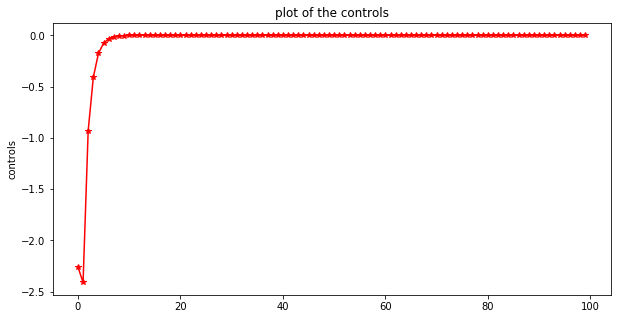

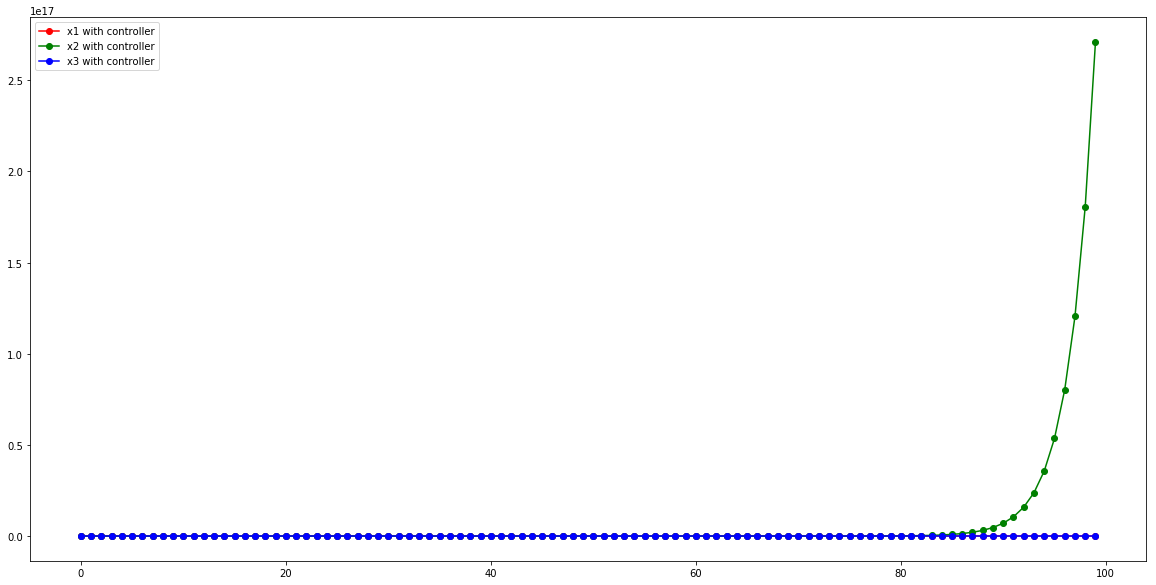

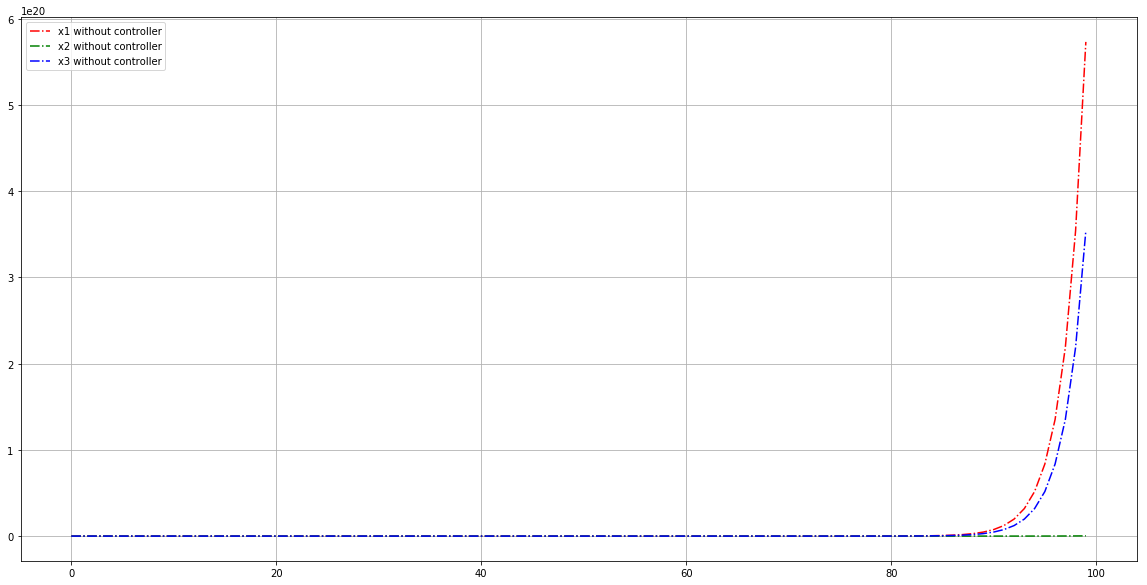

In [10]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 0 ,1], [0, 1.5, 0], [1, 0, 0]])
B = np.array([[0], [0], [1]])
Q = np.identity(3)
R = 0.1
x_0 = np.array([[1], [1], [1]])
horizon_length = 100
P, K = solve_ricatti_equations(A, B, Q, R, horizon_length)

#list of opt control for system 1 - U1
U1 = []

# list for state with control and without control
X_with_controller = []
X_without_controller = []

X_with_controller.append(x_0)
X_without_controller.append(x_0)

for i in range(horizon_length):
    
    #Calculate the control u_i
    U1.append(np.dot(K[i], X_with_controller[i]))
    
    #Calculate x_i+1 with control
    X_with_controller.append(np.dot(A, X_with_controller[i]) + np.dot(B, U1[i]))
    
    #Calculate x_i+1 without control
    X_without_controller.append(np.dot(A, X_without_controller[i]))

#plot control
U1 = [U1[i][0] for i in range(horizon_length)]
plt.figure(figsize=(10,5))
plt.ylabel('controls')
plt.title("plot of the controls")
plt.plot(range(horizon_length), U1, marker="*", color='red')

# state values with the controller
x1 = [X_with_controller[i][0] for i in range(horizon_length)]
x2 = [X_with_controller[i][1] for i in range(horizon_length)]
x3 = [X_with_controller[i][2] for i in range(horizon_length)]

# state values without controller
x_w1 = [X_without_controller[i][0] for i in range(horizon_length)]
x_w2 = [X_without_controller[i][1] for i in range(horizon_length)]
x_w3 = [X_without_controller[i][2] for i in range(horizon_length)]

#plot states 
plt.title('plot of the controls')
plt.figure(figsize=(20,10))
plt.plot(range(horizon_length), x1, color='red', label='x1 with controller', marker='o')
plt.plot(range(horizon_length), x2, color='green', label='x2 with controller',marker='o')
plt.plot(range(horizon_length), x3, color='blue', label='x3 with controller',marker='o')
plt.legend()
plt.figure(figsize=(20,10))
plt.plot(range(horizon_length), x_w1, color='red', label='x1 without controller', ls='-.')
plt.plot(range(horizon_length), x_w2, color='green', label='x2 without controller', ls='-.')
plt.plot(range(horizon_length), x_w3, color='blue', label='x3 without controller', ls='-.')
plt.grid()
plt.savefig('System-1')
plt.legend()
plt.show()


## System 2

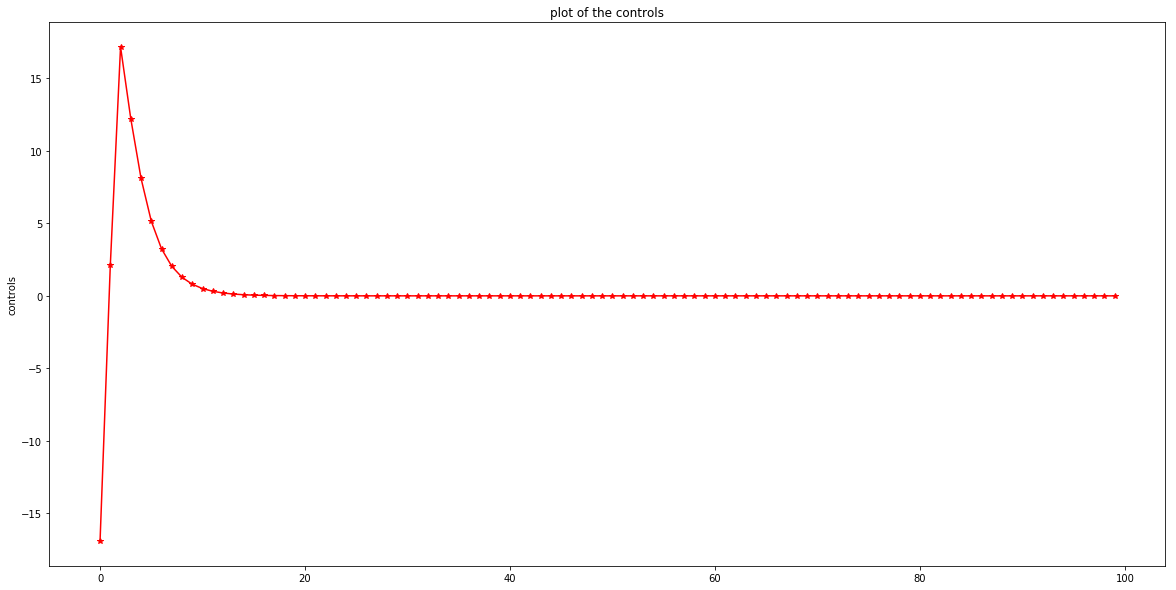

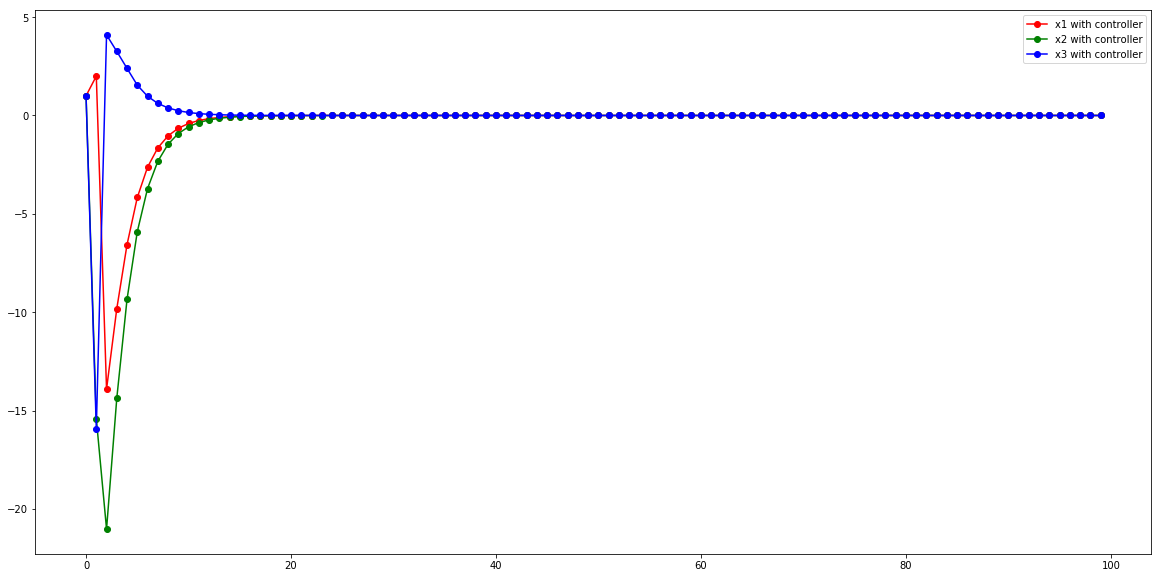

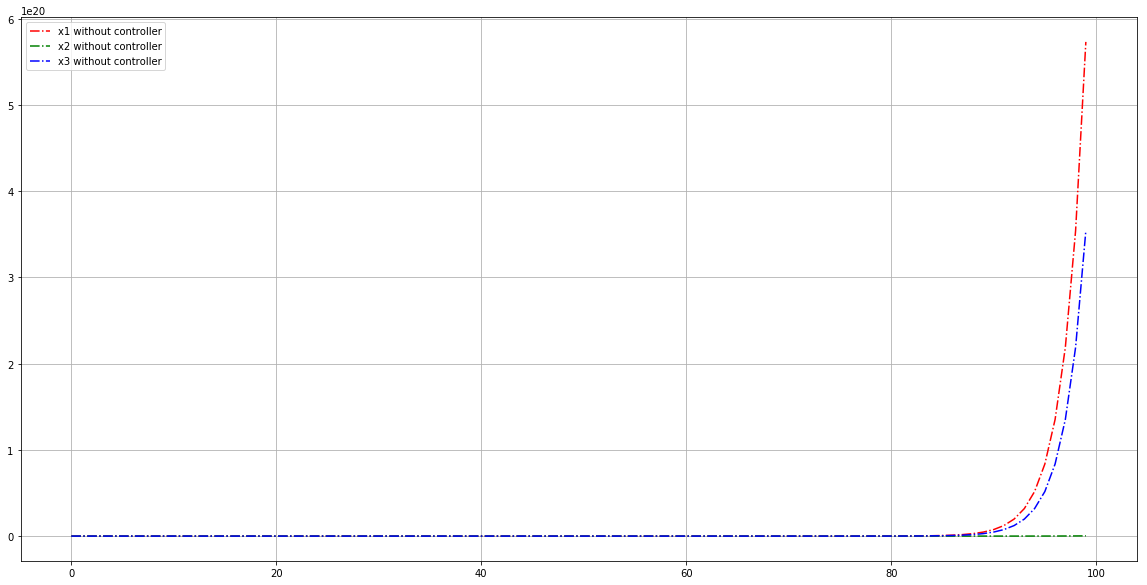

In [9]:
A = np.array([[1, 0 ,1], [0, 1.5, 0], [1, 0, 0]])
B = np.array([[0], [1], [1]])
Q = np.identity(3)
R = 0.1
x_0 = np.array([[1], [1], [1]])
horizon_length = 100
P, K = solve_ricatti_equations(A, B, Q, R, horizon_length)

#list of opt control for system 2 - U2
U2 = []

# list for state with control and without control
X_with_controller = []
X_without_controller = []

X_with_controller.append(x_0)
X_without_controller.append(x_0)

for i in range(horizon_length):
    
    #Calculate the control u_i
    U2.append(np.dot(K[i], X_with_controller[i]))
    
    #Calculate x_i+1 with control
    X_with_controller.append(np.dot(A, X_with_controller[i]) + np.dot(B, U2[i]))
    
    #Calculate x_i+1 without control
    X_without_controller.append(np.dot(A, X_without_controller[i]))

U2 = [U2[i][0] for i in range(horizon_length)]
plt.figure(figsize=(20,10))
plt.ylabel('controls')
plt.title("plot of the controls")
plt.plot(range(horizon_length), U2, marker='*', color='red')

# state values with the controller
x1 = [X_with_controller[i][0] for i in range(horizon_length)]
x2 = [X_with_controller[i][1] for i in range(horizon_length)]
x3 = [X_with_controller[i][2] for i in range(horizon_length)]

# state values without controller
x_w1 = [X_without_controller[i][0] for i in range(horizon_length)]
x_w2 = [X_without_controller[i][1] for i in range(horizon_length)]
x_w3 = [X_without_controller[i][2] for i in range(horizon_length)]

plt.figure(figsize=(20,10))
plt.plot(range(horizon_length), x1, color='red', label='x1 with controller',marker='o')
plt.plot(range(horizon_length), x2, color='green', label='x2 with controller',marker='o')
plt.plot(range(horizon_length), x3, color='blue', label='x3 with controller',marker='o')
plt.legend()
plt.figure(figsize=(20,10))
plt.plot(range(horizon_length), x_w1, color='red', label='x1 without controller',ls='-.')
plt.plot(range(horizon_length), x_w2, color='green', label='x2 without controller',ls='-.')
plt.plot(range(horizon_length), x_w3, color='blue', label='x3 without controller',ls='-.')

plt.grid()
plt.savefig('System-2')
plt.legend()
plt.show()


## System 3

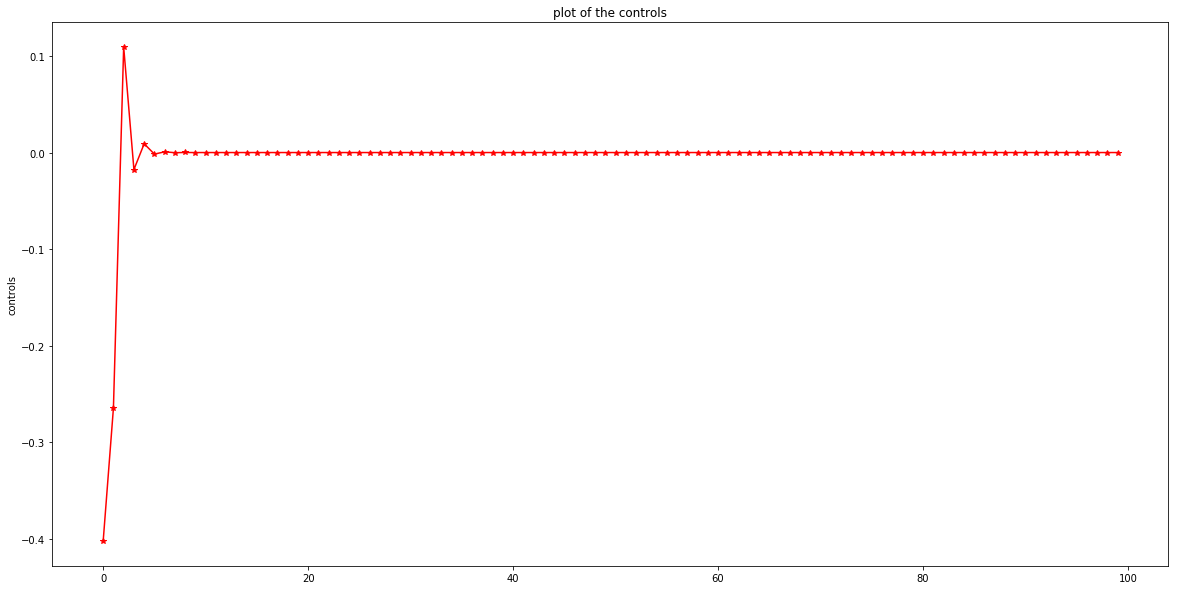

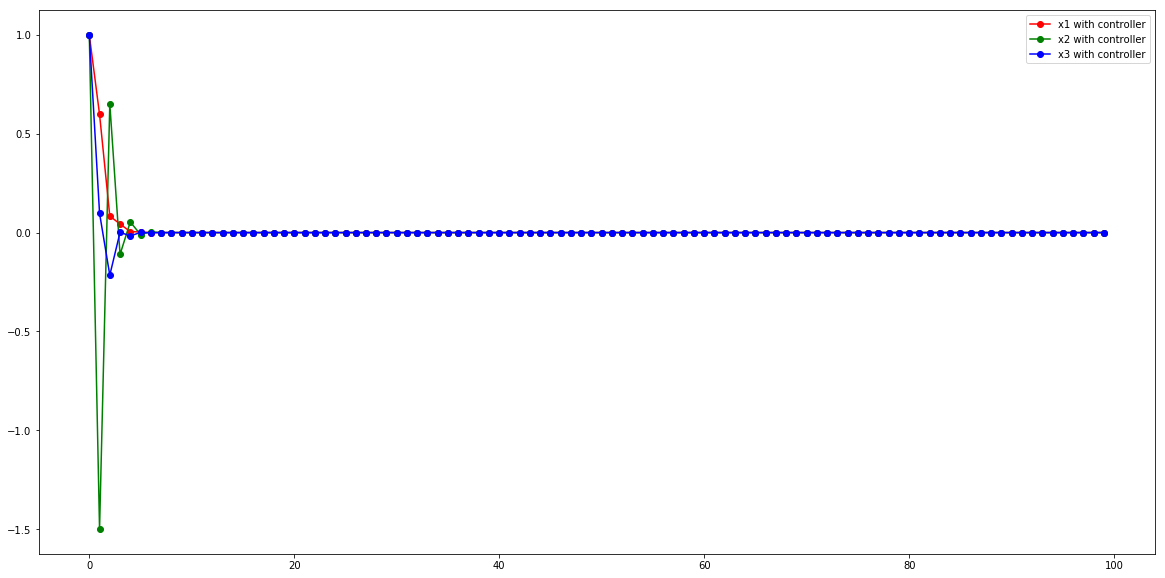

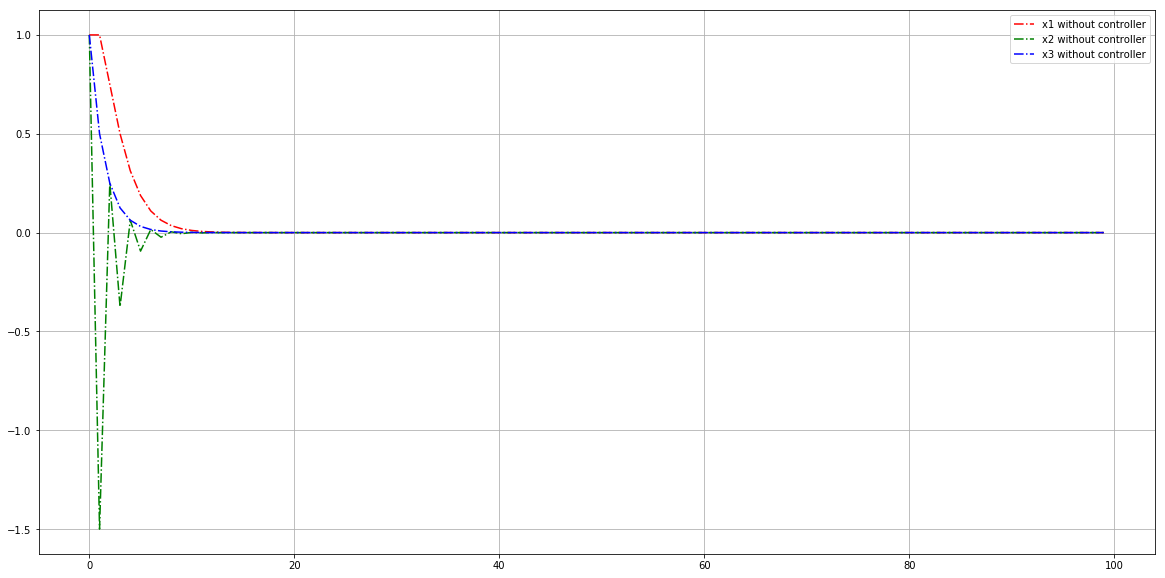

In [8]:
A = np.array([[0.5, 0 ,0.5], [0, -0.5, -1], [0, 0, 0.5]])
B = np.array([[1], [0], [1]])
Q = np.identity(3)
R = 0.1
x_0 = np.array([[1], [1], [1]])
horizon_length = 100
P, K = solve_ricatti_equations(A, B, Q, R, horizon_length)

#list of opt control
U3 = []

# list for state with control and without control
X_with_controller = []
X_without_controller = []

X_with_controller.append(x_0)
X_without_controller.append(x_0)

for i in range(horizon_length):
    
    #Calculate the control u_i
    U3.append(np.dot(K[i], X_with_controller[i]))
    
    #Calculate x_i+1 with control
    X_with_controller.append(np.dot(A, X_with_controller[i]) + np.dot(B, U3[i]))
    
    #Calculate x_i+1 without control
    X_without_controller.append(np.dot(A, X_without_controller[i]))

U3 = [U3[i][0] for i in range(horizon_length)]
plt.figure(figsize=(20, 10))
plt.ylabel('controls')
plt.title("plot of the controls")
plt.plot(range(horizon_length), U3, marker='*', color='red')

# state values with the controller
x1 = [X_with_controller[i][0] for i in range(horizon_length)]
x2 = [X_with_controller[i][1] for i in range(horizon_length)]
x3 = [X_with_controller[i][2] for i in range(horizon_length)]

# state values without controller
x_w1 = [X_without_controller[i][0] for i in range(horizon_length)]
x_w2 = [X_without_controller[i][1] for i in range(horizon_length)]
x_w3 = [X_without_controller[i][2] for i in range(horizon_length)]

plt.figure(figsize=(20,10))
plt.plot(range(horizon_length), x1, color='red', label='x1 with controller',marker='o')
plt.plot(range(horizon_length), x2, color='green', label='x2 with controller',marker='o')
plt.plot(range(horizon_length), x3, color='blue', label='x3 with controller',marker='o')
plt.legend()
plt.figure(figsize=(20,10))
plt.plot(range(horizon_length), x_w1, color='red', label='x1 without controller',ls='-.')
plt.plot(range(horizon_length), x_w2, color='green', label='x2 without controller',ls='-.')
plt.plot(range(horizon_length), x_w3, color='blue', label='x3 without controller',ls='-.')
plt.grid()
plt.savefig('System-3')
plt.legend()
plt.show()




## System 4

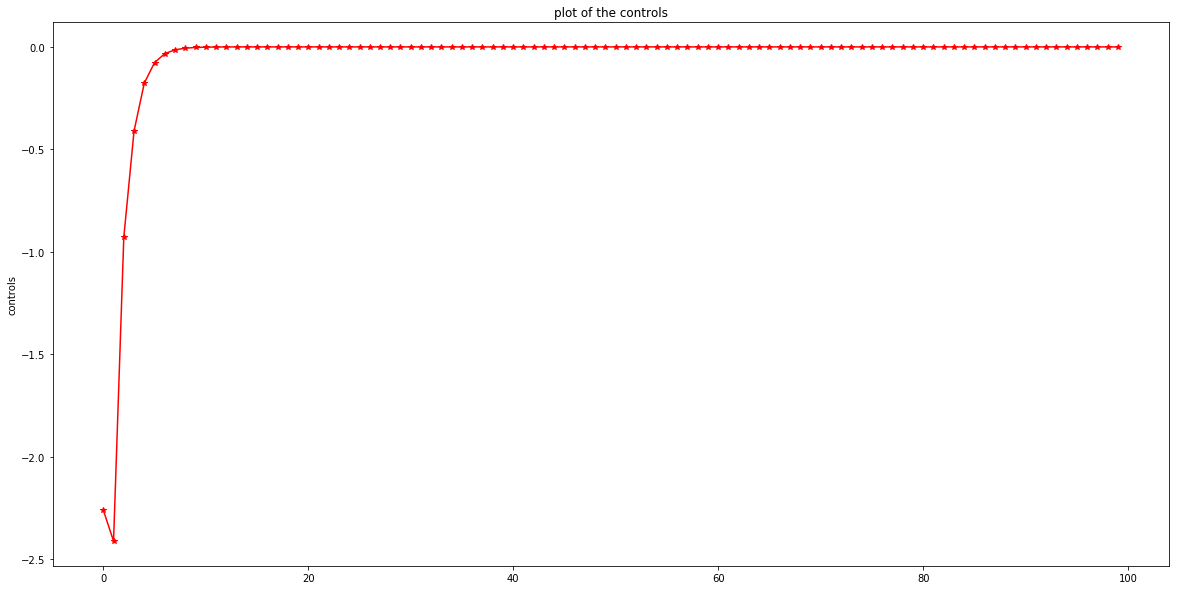

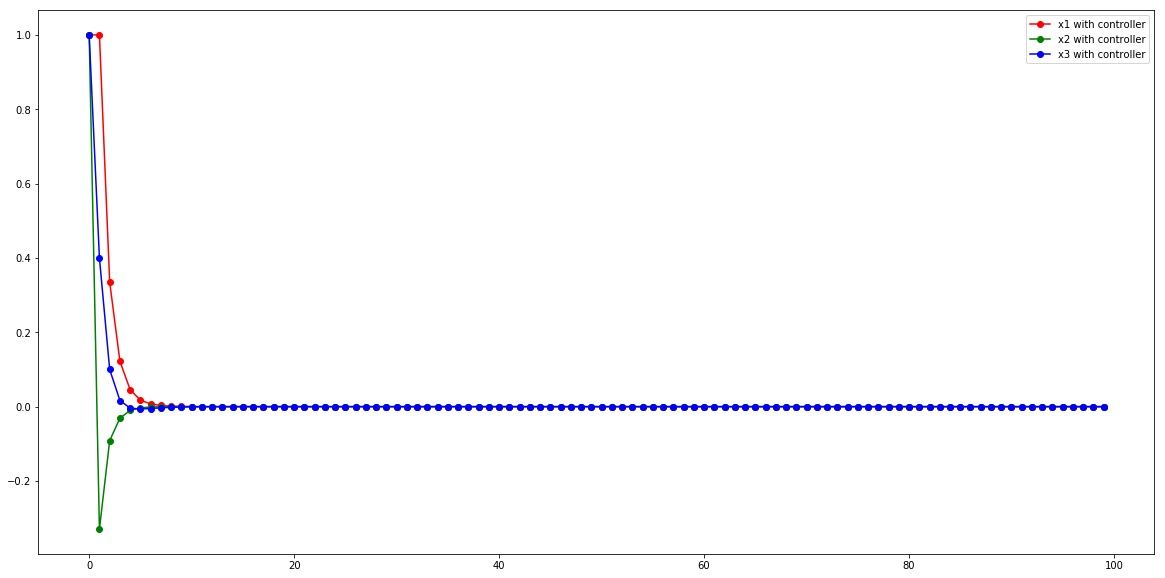

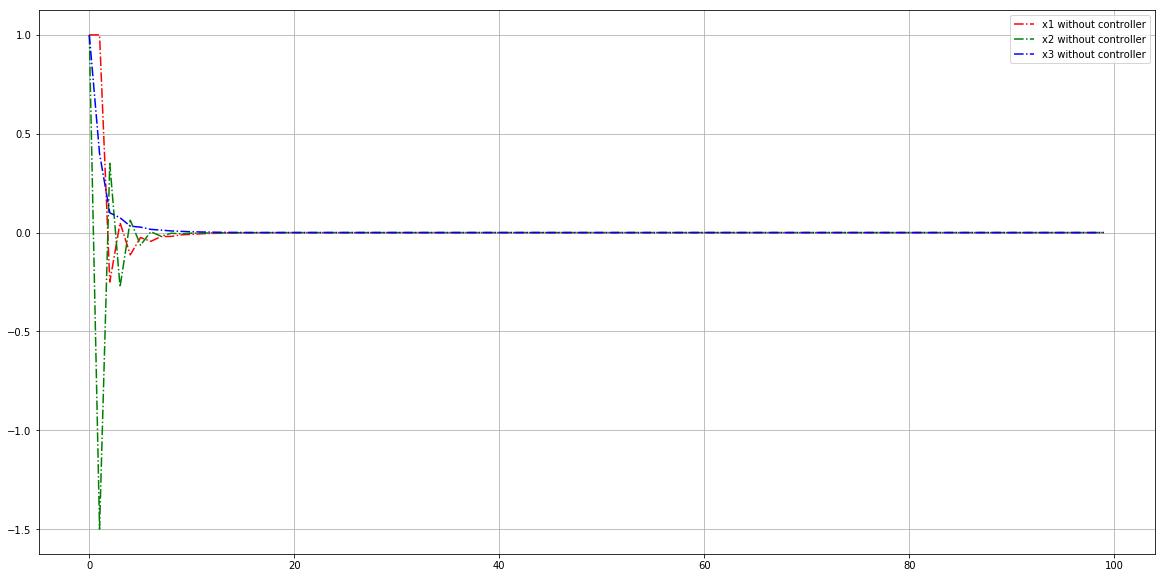

In [7]:
A = np.array([[0.5, 0.5 ,0], [0, -0.5, -1], [-0.1, 0, 0.5]])
B = np.array([[0], [1], [0]])
Q = np.identity(3)
R = 0.1
x_0 = np.array([[1], [1], [1]])
horizon_length = 100
P, K = solve_ricatti_equations(A, B, Q, R, horizon_length)

#list of control for system 4 - U4
U4 = []

# list for state with control and without control
X_with_controller = []
X_without_controller = []

X_with_controller.append(x_0)
X_without_controller.append(x_0)

for i in range(horizon_length):
    
    #Calculate the control u_i
    U4.append(np.dot(K[i], X_with_controller[i]))
    
    #Calculate x_i+1 with control
    X_with_controller.append(np.dot(A, X_with_controller[i]) + np.dot(B, U4[i]))
    
    #Calculate x_i+1 without control
    X_without_controller.append(np.dot(A, X_without_controller[i]))

U4 = [U1[i][0] for i in range(horizon_length)]
plt.figure(figsize=(20,10))
plt.ylabel('controls')
plt.title("plot of the controls")
plt.plot(range(horizon_length), U4, marker='*', color='red')

# state values with the controller
x1 = [X_with_controller[i][0] for i in range(horizon_length)]
x2 = [X_with_controller[i][1] for i in range(horizon_length)]
x3 = [X_with_controller[i][2] for i in range(horizon_length)]

# state values without controller
x_w1 = [X_without_controller[i][0] for i in range(horizon_length)]
x_w2 = [X_without_controller[i][1] for i in range(horizon_length)]
x_w3 = [X_without_controller[i][2] for i in range(horizon_length)]

plt.figure(figsize=(20,10))
plt.plot(range(horizon_length), x1, color='red', label='x1 with controller',marker='o')
plt.plot(range(horizon_length), x2, color='green', label='x2 with controller',marker='o')
plt.plot(range(horizon_length), x3, color='blue', label='x3 with controller',marker='o')
plt.legend()

plt.figure(figsize=(20,10))
plt.plot(range(horizon_length), x_w1, color='red', label='x1 without controller',ls='-.')
plt.plot(range(horizon_length), x_w2, color='green', label='x2 without controller',ls='-.')
plt.plot(range(horizon_length), x_w3, color='blue', label='x3 without controller',ls='-.')

plt.grid()
plt.savefig('System-4')
plt.legend()
plt.show()
